# Inference for numerical data

## North Carolina births

In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

## Exploratory analysis

Load the `nc` data set into our notebook.

In [1]:
# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
# if this does not fix the issue, run this command instead.
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd

nc = pd.read_csv('https://www.openintro.org/stat/data/nc.csv')

We have observations on 13 different variables, some categorical and some numerical. The meaning of each variable is as follows.

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |

<div class = 'exercise'>
<h4>Exercise 1</h4>
What are the cases in this data set? How many cases are there in our sample?
</div>

As a first step in the analysis, we should consider summaries of the data. This can be done using the `describe()` and `info()`:

In [2]:
nc.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


In [3]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            829 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           998 non-null    float64
 4   premie          998 non-null    object 
 5   visits          991 non-null    float64
 6   marital         999 non-null    object 
 7   gained          973 non-null    float64
 8   weight          1000 non-null   float64
 9   lowbirthweight  1000 non-null   object 
 10  gender          1000 non-null   object 
 11  habit           999 non-null    object 
 12  whitemom        998 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


As you review the variable summaries, consider which variables are categorical and which are numerical. For numerical variables, are there outliers? If you aren't sure or want to take a closer look at the data, make a graph.

Consider the possible relationship between a mother's smoking habit and the weight of her baby. Plotting the data is a useful first step because it helps us quickly visualize trends, identify strong associations, and develop research questions.

<div class = 'exercise'>
<h4>Exercise 2</h4>
    Make a side-by-side boxplot of <code>habit</code> and <code>weight</code>. What does the plot highlight about the relationship between these two variables?
</div>

The box plots show how the medians of the two distributions compare, but we can also compare the means of the distributions using the following function to split the `weight` variable into the `habit` groups, then take the mean of each using `mean()`.

In [4]:
nc.groupby(['habit'])['weight'].mean()

habit
nonsmoker    7.144273
smoker       6.828730
Name: weight, dtype: float64

There is an observed difference, but is this difference statistically significant? In order to answer this question we will conduct a hypothesis test .

## Inference

<div class = "exercise">
<h4>Exercise 3</h4>
Check if the conditions necessary for inference are satisfied. Note that you will need to obtain sample sizes to check the conditions. You can compute the group size using the same <code>groupby</code> command above but replacing <code>mean</code> with <code>size</code>.
</div>

<div class = "exercise">
<h4>Exercise 4</h4>
Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.
</div>

We will now conduct hypothesis tests for testing if the average weights of babies born to smoking and non-smoking mothers are different. For this task, we can use [`statsmodels`](https://www.statsmodels.org/stable/index.html), a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [5]:
import statsmodels.stats.weightstats as st

nc_weightANDsmoker = nc[nc['habit'] == 'smoker']['weight']
nc_weightANDnonsmoker = nc[nc['habit'] == 'nonsmoker']['weight']

dsw1 = st.DescrStatsW(nc_weightANDsmoker)
dsw2 = st.DescrStatsW(nc_weightANDnonsmoker)
cm = st.CompareMeans(dsw1, dsw2)

# calculate number of observations, mean and standard deviation for each group
n_smoker = dsw1.nobs
n_nonsmoker = dsw2.nobs
mean_smoker = dsw1.mean
mean_nonsmoker = dsw2.mean
sd_smoker = dsw1.std
sd_nonsmoker = dsw2.std
print(f'n_smoker = {n_smoker}')
print(f'mean_smoker = {mean_smoker}')
print(f'sd_smoker = {sd_smoker}')
print()
print(f'n_nonsmoker = {n_nonsmoker}')
print(f'mean_nonsmoker = {mean_nonsmoker}')
print(f'sd_nonsmoker = {sd_nonsmoker}')
print()

# conduct hypothesis test
ht = cm.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

# calculate and print the standard error, the Z-score, and p-value for the hypothesis test
se = cm.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_smoker = 126.0
mean_smoker = 6.828730158730159
sd_smoker = 1.380668106117173

n_nonsmoker = 873.0
mean_nonsmoker = 7.144272623138601
sd_nonsmoker = 1.5178105512705897

Standard error = 0.13376049190705977
Test statistic: Z = -2.3590109449334946
p-value = 0.018323715325166526
reject null hypothesis


<div class = 'exercise'>
<h4>Exercise 5</h4>
Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.</div>

---
## On Your Own

<ol>
    <li>Calculate a 95% confidence interval for the average length of pregnancies (<code>weeks</code>) and interpret it in context. Note that since you're doing inference on a single population parameter, there is no explanatory variable, so you can omit the <code>x</code> variable from the function.</li><br>
    <li>Calculate a new confidence interval for the same parameter at the 90% confidence level.</li><br>
    <li>Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.</li><br>
    <li>Now, a non-inference task: Determine the age cutoff for younger and mature mothers. Use a method of your choice, and explain how your method works.</li><br>
    <li>Pick a pair of numerical and categorical variables and come up with a research question evaluating the relationship between these variables. Formulate the question in a way that it can be answered using a hypothesis test and/or a confidence interval. Answer your question with Python, report the statistical results, and also provide an explanation in plain language.</li>
</ol>

<div class = "license">
This lab was adapted by Vural Aksakalli and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

### 7.5 Comparing many means with ANOVA 

In [6]:
import pandas as pd
mbl = pd.read_csv('https://www.openintro.org/data/csv/mlb_players_18.csv')

In [7]:
mbl.shape

(1270, 19)

In [8]:
# At least 100 at bats (in the textbook there are 429 such players)
mbl = mbl[(mbl.AB >= 100) & (mbl.position != 'P') & (mbl.position != 'DH')]
mbl.shape

(429, 19)

In [9]:
# Textbook works just with three groups: infield, outfield and catcher
ofs = (mbl.position == 'CF')|(mbl.position == 'LF')|(mbl.position == 'RF')
ifs = (mbl.position == '1B')|(mbl.position == '2B')|(mbl.position == '3B')|(mbl.position == 'SS') 
cs = mbl.position == 'C'

In [10]:
mbl.position.value_counts()

C     64
2B    56
3B    55
RF    54
LF    53
CF    53
1B    51
SS    43
Name: position, dtype: int64

In [11]:
onfield = mbl['OBP'][ifs]
onfield.describe()

count    205.000000
mean       0.318385
std        0.037931
min        0.210000
25%        0.295000
50%        0.316000
75%        0.345000
max        0.417000
Name: OBP, dtype: float64

In [12]:
outfield = mbl['OBP'][ofs]
outfield.describe()

count    160.000000
mean       0.319819
std        0.042607
min        0.162000
25%        0.295750
50%        0.322000
75%        0.342250
max        0.460000
Name: OBP, dtype: float64

In [13]:
catcher = mbl['OBP'][cs]
catcher.describe()

count    64.000000
mean      0.301937
std       0.038171
min       0.226000
25%       0.273500
50%       0.299000
75%       0.333500
max       0.378000
Name: OBP, dtype: float64

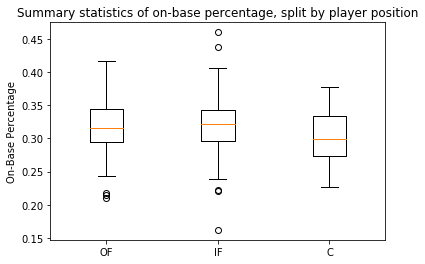

In [14]:
import matplotlib.pyplot as plt
plt.boxplot([onfield, outfield,catcher], labels=['OF', 'IF', 'C'])
plt.ylabel('On-Base Percentage')
plt.title('Summary statistics of on-base percentage, split by player position')
plt.show()

#### Scipy way

In [15]:
from scipy.stats import f_oneway
f_oneway(onfield, outfield, catcher)

F_onewayResult(statistic=5.076573914317898, pvalue=0.006624227134656169)

In [16]:
mbl = pd.read_csv('https://www.openintro.org/data/csv/mlb_players_18.csv')
mbl = mbl[(mbl.AB >= 100) & (mbl.position != 'P') & (mbl.position != 'DH')]

In [17]:
def gather_position(position):
    if 'F' in position:
        return 'OF'
    elif 'B' in position or position == 'SS':
        return 'IF'
    elif position == 'C':
        return 'C'

In [18]:
mbl['position'] = mbl['position'].apply(gather_position)
mbl['position'].value_counts()

IF    205
OF    160
C      64
Name: position, dtype: int64

#### Statsmodels way

Followed instructions from [Python for Data Science](https://pythonfordatascience.org/) blog and article [Analysis of Variance (ANOVA)](https://pythonfordatascience.org/anova-python/#test)

In [19]:
from statsmodels.formula.api import ols
results = ols('OBP ~ position', data=mbl).fit()

In [20]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    OBP   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     5.077
Date:                Sun, 03 May 2020   Prob (F-statistic):            0.00662
Time:                        17:32:26   Log-Likelihood:                 776.10
No. Observations:                 429   AIC:                            -1546.
Df Residuals:                     426   BIC:                            -1534.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3019      0.005     60.

In [21]:
import statsmodels.api as sm
aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

            sum_sq     df         F    PR(>F)
position  0.016063    2.0  5.076574  0.006624
Residual  0.673950  426.0       NaN       NaN


In [22]:
from scipy.stats import f_oneway
f_oneway(mbl['OBP'][mbl.position == 'IF'], mbl['OBP'][mbl.position == 'OF'], mbl['OBP'][mbl.position == 'C'])

F_onewayResult(statistic=5.076573914317898, pvalue=0.006624227134656169)

***
www.featureranking.com